## Capstone Project - IOT Malware and Intrusion detection using Machine Learning

### Introduction

Internet of things (IoT) devices and applications are dramatically growing worldwide, leading to ever-increasing cybersecurity challenges. The IoT devices have tendencies to be vulnerable because these devices lack the necessary secure environment and security measures to counter security threats. To deal with the problem, practical defensive measures such as Intrusion and malware detection solutions are required to be adopted to safeguard the IoT devices. Since IoT devices have limited memory and processing capacity, conventional security solutions are not adequate to provide sufficient defense for the IoT systems. Robust and efficient network-based security solutions need to be devised and adopted using machine learning (ML) algorithms to unearth the underlying threat patterns, by evaluating massive volumes of IoT data. 

As part of this Capstone project, the efficacy of decision fusion method is measured using multiple ML algorithms that can be employed to efficiently discover IoT network threats. In this project, different ML algorithms are utilized, participating in a voting method to derive the ML classifier decision. 

### DataSet Description & basic data exploration

The data set to be used in this project is IoT-23 , which was created based on a study conducted by the Avast Laboratory, AIC group, CTU University, Czech Republic. 

- The dataset has 23 captures from network traffic captured on IoT devices.
    - The captures include 20 malicious captures and 3 secure/benign traffic. 
    - Captures are in form of pcap files generated from network traffic and conn.log.labeled files produced from pcap files. 
    - Captures includes 325 million packet flows with 294 million malicious packet flows.
    - The generated log files (conn.log. labeled) contain a wealth of information related to network traffic, including hosts' information, their IP addresses, protocols, ports etc.

The size of pcap files is huge(80 Gb) and is very cumbersome to get analyzed, and doesn’t give any advantage as such in comparison to conn.log.labeled files. As a result, the scope of this project is confined to working with the conn.log.labeled files.

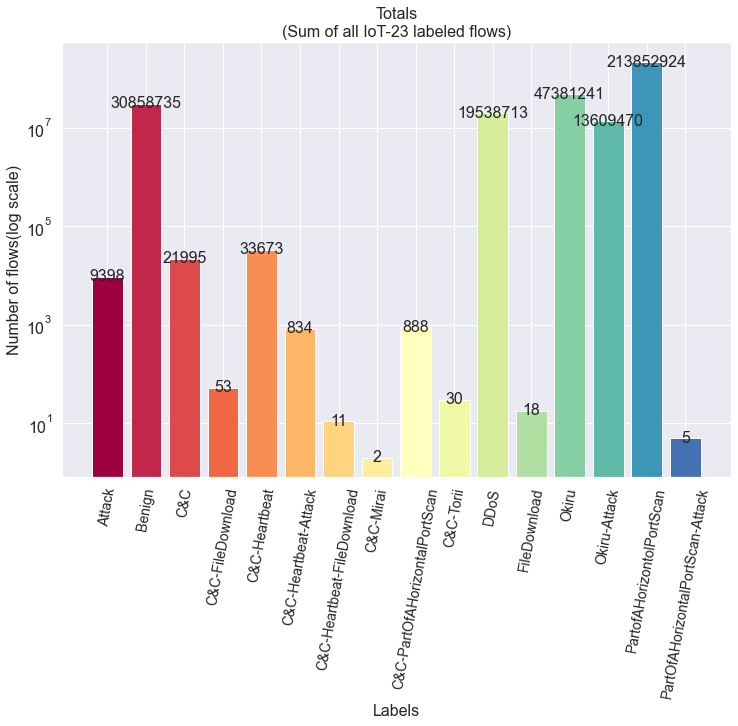

##### Benign vs Malicious class distribution

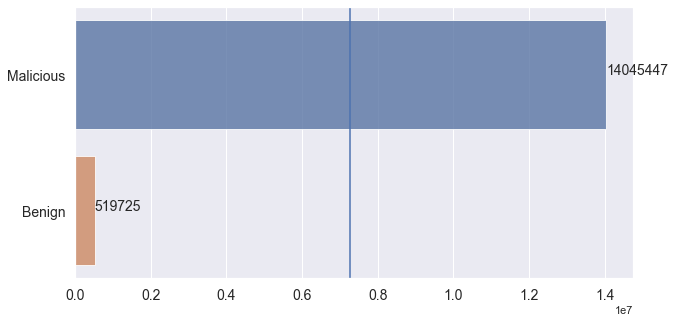

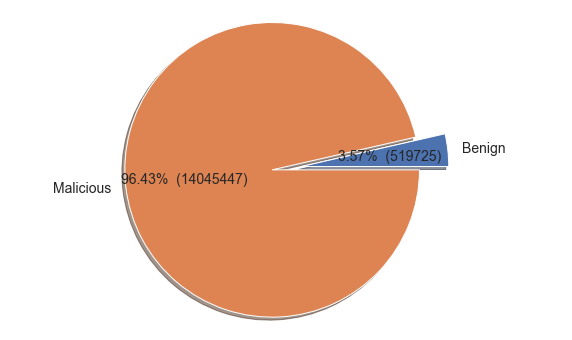

#### Traffic - types (Protocol) - Looks majorly TCP traffic

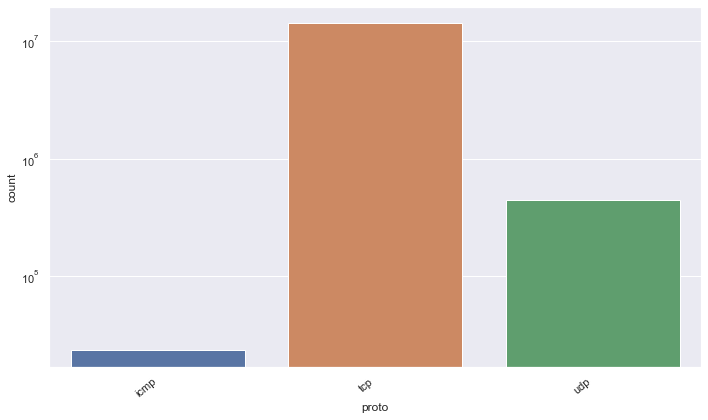

#### Top 10 ports used by the responding endpoint. Telnet(23) is the most port used.

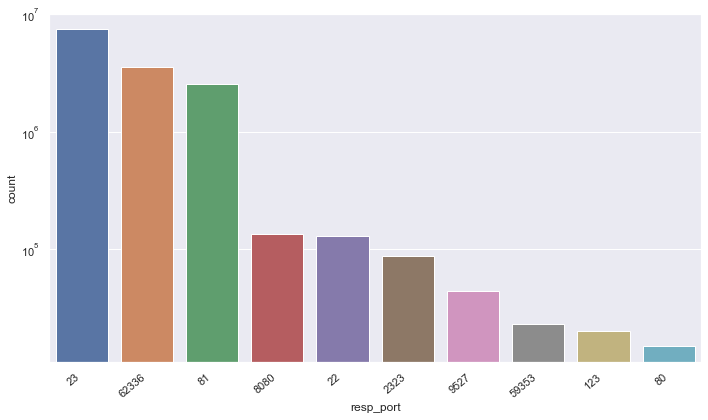

#### Top 10 ports used by the originating endpoint.

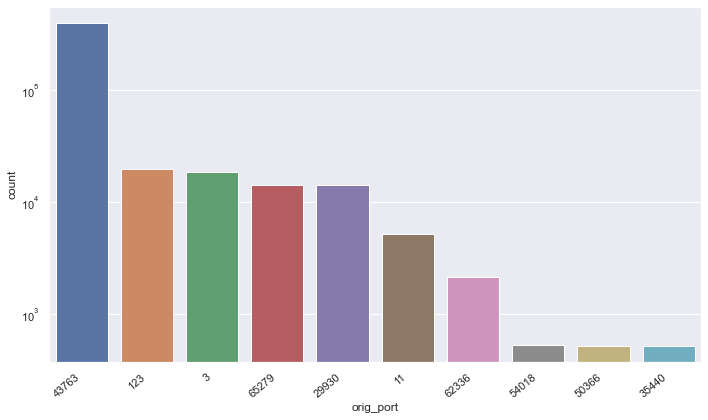

#### Responder payload bytes

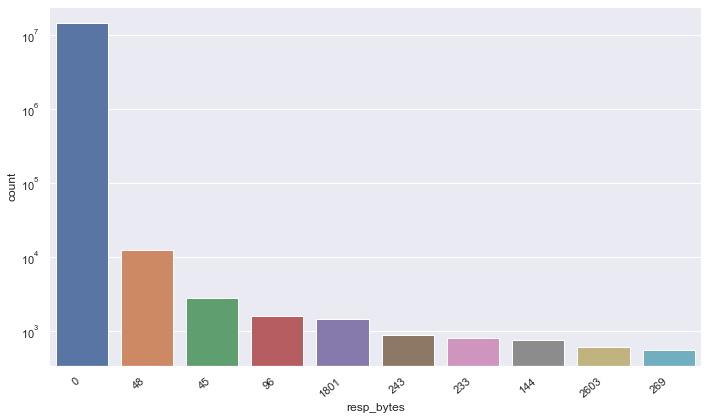

#### Connection States

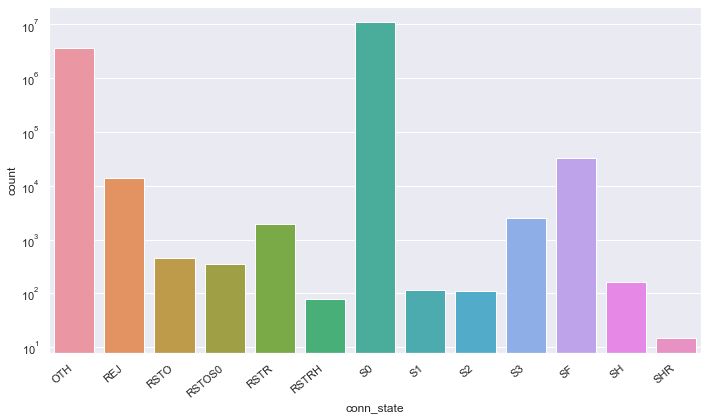

#### History

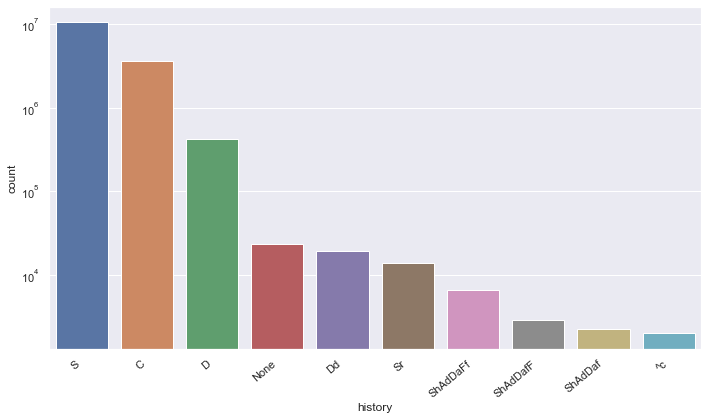

### Correlation Matrix

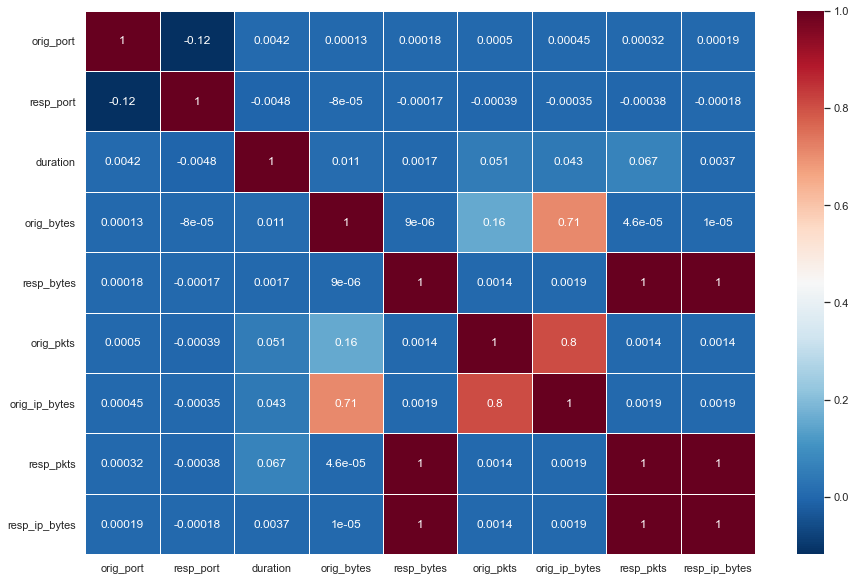

## Model Build

In [26]:
cd D:\Sunil\Professional\DataScience\DataIncubator\Capstone Project\iot_23_datasets_small\IoTScenarios\data

D:\Sunil\Professional\DataScience\DataIncubator\Capstone Project\iot_23_datasets_small\IoTScenarios\data


In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from collections import Counter

In [21]:
def load_pkl(data_file,family=False):
    df = pd.read_pickle(data_file)
    
    le = LabelEncoder()
    
    df['conn_state'] = le.fit_transform(df['conn_state'])
    df['history'] = le.fit_transform(df['history'])
    df = pd.get_dummies(data=df,columns=['proto'])
    
    X = df.drop(['label', 'combined-label'], axis=1)
    
    if(family):
        y = df['combined-label']
    else:
        y = df['label']
    y = le.fit_transform(y)
    
    return X,y

In [22]:
X,y = load_pkl('data.pkl')
# summarize the loaded dataset
print(X.shape, y.shape, Counter(y))

(14565172, 14) (14565172,) Counter({1: 14045447, 0: 519725})


In [23]:
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2)

In [25]:
# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) # scaling should be fit on training data 
X_test_scaled = scaler.transform(X_test) # Only transform the test data

## Logistic Regression classifier (without class_weight and normalization)

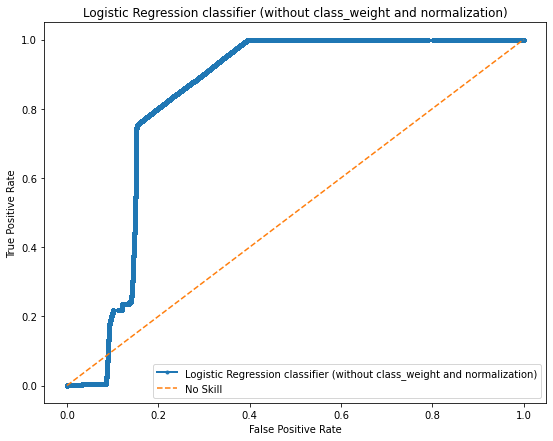

## Logistic Regression classifier (with class_weight and without normalization)

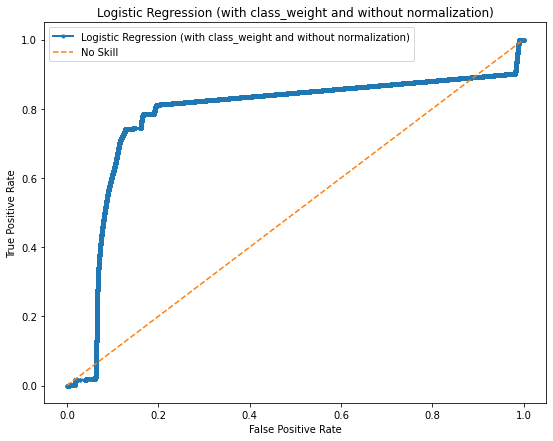

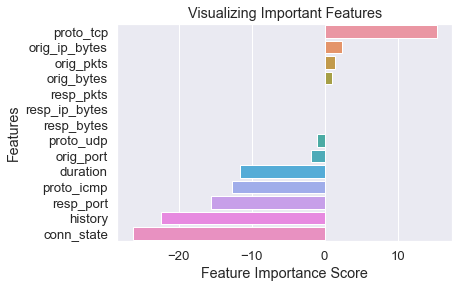

## RandomForest classifier

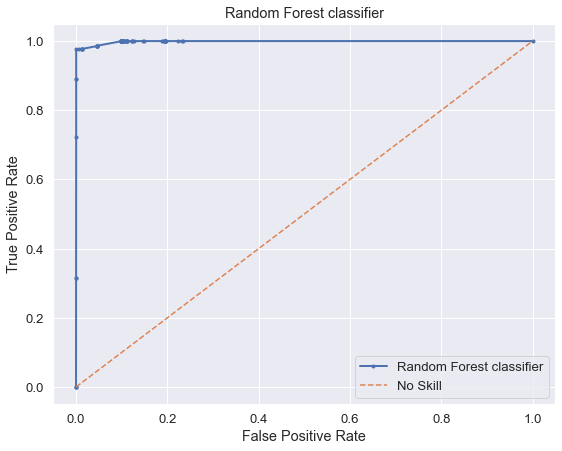

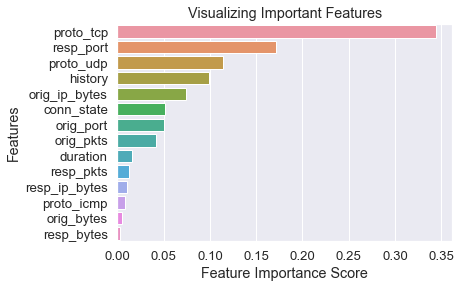

## Naive Bayes classifier

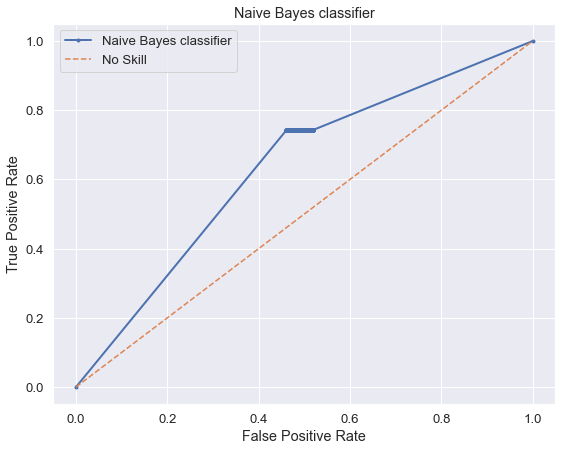

## Neural Network classifier

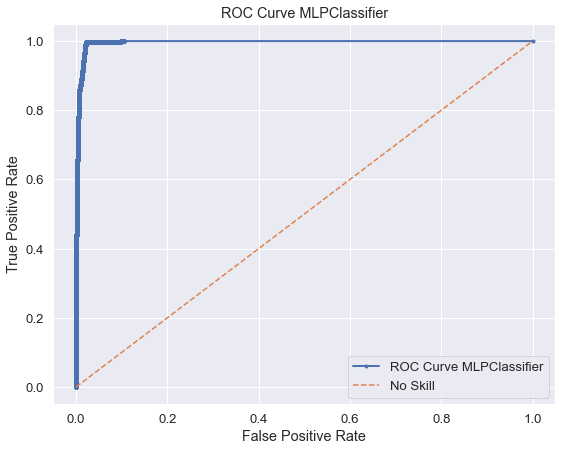

## Catboost classifier

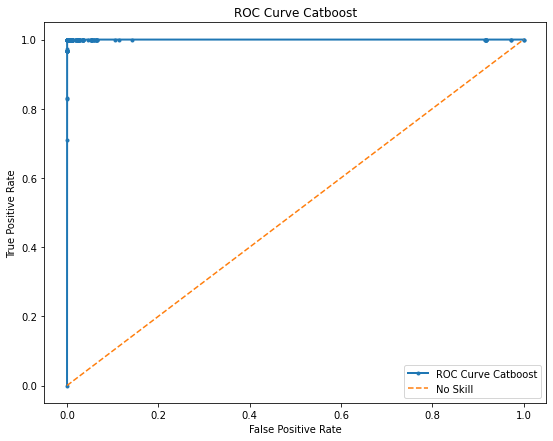

## Votingclassifier 

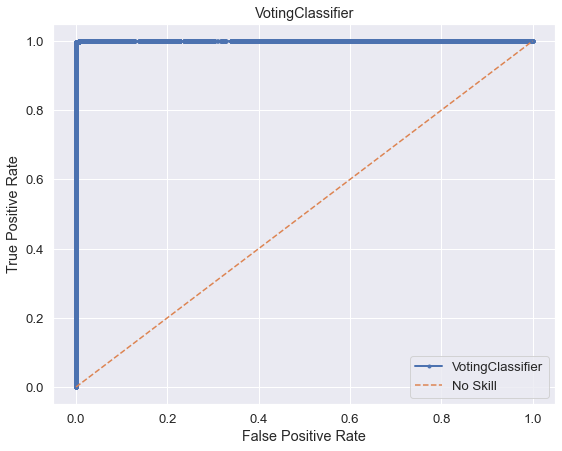

## Testing the model with Test file 

In [33]:
import pandas as pd

# sklearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
%matplotlib inline 


In [28]:
df = pd.read_csv('data_to_test.csv')

In [29]:
df.head()

,orig_port,resp_port,proto,duration,orig_bytes,resp_bytes,conn_state,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,combined-label
0,24827,81,tcp,0.000000,0,0,S0,S,1,40,0,0,Malicious,PartOfAHorizontalPortScan
1,33806,23,tcp,0.000213,0,0,S0,S,2,120,0,0,Malicious,PartOfAHorizontalPortScan
2,43763,51368,udp,0.000000,0,0,S0,D,1,40,0,0,Benign,Benign
3,2715,81,tcp,0.000000,0,0,S0,S,1,40,0,0,Malicious,PartOfAHorizontalPortScan
4,43957,23,tcp,0.000000,0,0,S0,S,1,60,0,0,Malicious,PartOfAHorizontalPortScan


In [30]:
# Label encode the data
le = LabelEncoder()
df['conn_state'] = le.fit_transform(df['conn_state'])
df['history'] = le.fit_transform(df['history'])
df = pd.get_dummies(data=df,columns=['proto'])

X = df.drop(['label', 'combined-label'], axis=1)
y = df['label']
y = le.fit_transform(y)

# Normalize the data
X_scaled = scaler.transform(X) # Only transform the test data

In [32]:
import pickle
import warnings
warnings.filterwarnings('ignore')

# load the model from disk
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
predicted = loaded_model.predict(X_scaled)
report = classification_report(y, predicted)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        40
           1       1.00      1.00      1.00       960

    accuracy                           1.00      1000
   macro avg       1.00      0.95      0.97      1000
weighted avg       1.00      1.00      1.00      1000

